In [17]:
import pandas as pd

In [19]:
df = pd.read_csv('Dataset/tweet_data.csv - tweet_data.csv.csv')
df

,textID,tweet_text,sentiment
0,1956967666,Layin n bed with a headache ughhhh...waitin o...,negative
1,1956967696,Funeral ceremony...gloomy friday...,negative
2,1956967789,wants to hang out with friends SOON!,positive
3,1956968477,Re-pinging @ghostridah14: why didn't you go to...,negative
4,1956968636,Hmmm. http://www.djhero.com/ is down,negative
...,...,...,...
18722,1753918818,"had SUCH and AMAZING time last night, McFly we...",positive
18723,1753918881,@jasimmo Ooo showing of your French skills!! l...,positive
18724,1753918900,Succesfully following Tayla!!,positive
18725,1753919001,Happy Mothers Day All my love,positive


In [20]:
len(df)

18727

In [22]:
len(df['tweet_text'].unique())

18615

In [23]:
len(df[df['sentiment'] == 'negative'])

8830

In [24]:
len(df[df['sentiment'] == 'positive'])

9897

In [25]:
pos = len(df[df['sentiment'] == "positive"]) / len(df['sentiment'])
neg = len(df[df['sentiment'] == "negative"]) / len(df['sentiment'])

print(pos)
print(neg)

0.5284882789555188
0.47151172104448125


In [26]:
import matplotlib.pyplot as plt

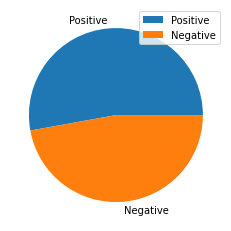

In [31]:
plt.pie([pos, neg], labels=["Positive", "Negative"])
plt.legend()
plt.show()

In [32]:
import re
import nltk

In [33]:
def tok(txt):
    txt2 = re.split('\W+', txt)
    
    return txt2

In [34]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: tok(x))
df

,textID,tweet_text,sentiment
0,1956967666,"[Layin, n, bed, with, a, headache, ughhhh, wai...",negative
1,1956967696,"[Funeral, ceremony, gloomy, friday, ]",negative
2,1956967789,"[wants, to, hang, out, with, friends, SOON, ]",positive
3,1956968477,"[Re, pinging, ghostridah14, why, didn, t, you,...",negative
4,1956968636,"[Hmmm, http, www, djhero, com, is, down]",negative
...,...,...,...
18722,1753918818,"[had, SUCH, and, AMAZING, time, last, night, M...",positive
18723,1753918881,"[, jasimmo, Ooo, showing, of, your, French, sk...",positive
18724,1753918900,"[Succesfully, following, Tayla, ]",positive
18725,1753919001,"[Happy, Mothers, Day, All, my, love]",positive


In [36]:
stopwords = nltk.corpus.stopwords.words('english')

def removeStopwords(txt):
    txt2 = []
    
    for t in txt:
        if t not in nltk.corpus.stopwords.words('english'):
            txt2.append(t)
            
    return txt2

In [37]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: removeStopwords(x))
df['tweet_text']

0        [Layin, n, bed, headache, ughhhh, waitin, call, ]
1                    [Funeral, ceremony, gloomy, friday, ]
2                           [wants, hang, friends, SOON, ]
3        [Re, pinging, ghostridah14, go, prom, BC, bf, ...
4                           [Hmmm, http, www, djhero, com]
                               ...                        
18722    [SUCH, AMAZING, time, last, night, McFly, INCR...
18723    [, jasimmo, Ooo, showing, French, skills, lol,...
18724                    [Succesfully, following, Tayla, ]
18725                     [Happy, Mothers, Day, All, love]
18726    [Happy, Mother, Day, mommies, woman, man, long...
Name: tweet_text, Length: 18727, dtype: object

In [38]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

def pStem(txt):
    pS = PorterStemmer()
    
    return [pS.stem(w) for w in txt]

def lemma(txt):
    wL = WordNetLemmatizer()
    
    return [wL.lemmatize(w) for w in txt]

In [39]:
df['tweet_text'] = df['tweet_text'].apply(lambda x: pStem(x))
df['tweet_text'] = df['tweet_text'].apply(lambda x: lemma(x))
df['tweet_text']

0         [layin, n, bed, headach, ughhhh, waitin, call, ]
1                      [funer, ceremoni, gloomi, friday, ]
2                             [want, hang, friend, soon, ]
3        [re, ping, ghostridah14, go, prom, bc, bf, lik...
4                           [hmmm, http, www, djhero, com]
                               ...                        
18722       [such, amaz, time, last, night, mcfli, incred]
18723    [, jasimmo, ooo, show, french, skill, lol, thi...
18724                            [succes, follow, tayla, ]
18725                      [happi, mother, day, all, love]
18726    [happi, mother, day, mommi, woman, man, long, ...
Name: tweet_text, Length: 18727, dtype: object